# Random number generation (Mersenne Twister)

-------------------------

_**Problem Instructions:**_

**a) Research on MT19937 Algorithm**

Research the MT19937 (Mersenne Twister) algorithm for generating uniform random numbers. Provide a discussion on its features, period length, and efficiency compared to other random number generators such as linear congruential generators (LCG) and hardware-based generators. Consider discussing real-world applications where MT19937 is commonly used and any potential limitations it may have.

**b) Distribution Sampling**

Using the MT19937 algorithm, write a program that generates N samples from each of the following continuous distributions:
- Uniform(a, b)
- Exponential(λ)
- Normal(μ, σ²)
- Any other continuous distribution not discussed in class (e.g. Beta, Cauchy, Pareto, etc)

Explain the process of transforming uniform random numbers into these distributions. Provide clear mathematical justifications for the transformations used (e.g., inverse transform sampling, Box-Muller method for normal distribution). Plot the histograms of your generated samples and compare them with theoretical probability density functions (PDFs). Discuss any discrepancies and potential reasons for deviations.

-------------------------

## Understanding of the Problem

### A) Research on MT19337 Algorithm

For this part, the following tasks are expected to be done:
- Understand the Mersenne Twister algorithm -- a pseudorandom number generator (PRNG)
- Discuss the features of the MT19937 algorithm.
    - Discuss what is period length and what it is for Mersenne Twister algorithm.
    - Discuss the efficiency in comparison to:
        - Linear Congruential Generators (LCG) - simpler RNG with shorter periods and poorer randomness
        - Hardware-based generators - use physical signals (i.e. thermal noise, mouse movements, etc.)
- List real-world applications where MT19937 is used
- Discuss what are the limitations of the MT19937 algorithm.

### B) Generating Random Samples from Continuous Distributions

For the second part, the following tasks are expected to be done:
- Use the algorithm to generate uniform random numbers in [0,1) by drawing samples from the following distributions:
    - Uniform(a, b)
    - Exponential(λ)
    - Normal(μ, σ²)
    - Any other continuous distribution not discussed in class (e.g. Beta, Cauchy, Pareto, etc)
- Explain the mathematical reasons behind the methods used to convert uniform random numbers into the desired distributions (e.g., using inverse transform sampling, or the Box-Muller method for generating normal distribution).
- Plot the histograms vs theoretical PDFs
    - Generate many sampled and plot their histograms
    - Overlay the true PDF curve on the histogram
- Analyze any differences between the generated samples and explain possible reasons for these differences.

## Research on MT19337 Algorithm

### Understanding the Mersenne Twister algorithm

The MT19337 (Mersenne Twister) algorithm is an algorithm developed by Makoto Matsumoto and Takuji Nishimura in 1997 [\[1\]](#References). It is a deterministic pseudorandom number generator (PRNG) which means its output is determined by an initial seed value making sequences reproducible, and it approximates true randomness through mathematical operations (unlike true random generators which depends on physical entropy).

The following diagram shows a simplified version core logic of the MT19337 algorithm.

![MT19937_Simplified_Core_Logic](images/MT19937_Simplified_Core_Logic.png)

From above core logic diagram, we notice the two operations that holds the mathematical core of the algorithm. These are the **Twist** and **Temper** operations. Simply put, twisting is done for every 624 generation of a random number, and tempering is done for each output.

**Summary of the Twist Operation:**

For all \( i = 0 \) to \( n-1 \):
\begin{aligned}
y_i &= (\text{MT}_i \land \text{upper\_mask}) + (\text{MT}_{(i+1) \bmod n} \land \text{lower\_mask}) \\
\text{MT}'_i &= \text{MT}_{(i + m) \bmod n} \oplus \left\lfloor \frac{y_i}{2} \right\rfloor \\
\text{if } y_i \bmod 2 = 1 &: \text{MT}'_i \leftarrow \text{MT}'_i \oplus a
\end{aligned}

- _with the following defined constants:_
    | Symbol      | Value         | Description                               |
    |-------------|---------------|-------------------------------------------|
    |   a         | `0x9908B0DF`  | Coefficient for the twist transformation  |
    | upper_mask  | `0x80000000`  | Most significant w-r bits (w=32-bit length of a word)|
    | lower_mask  | `0x7FFFFFFF`  | Least significant r bits                  |

**Summary of the Temper Operation:**

\begin{aligned}
y &\leftarrow y \oplus \left( \frac{y}{2^u} \right) \quad &\text{(right shift)} \\
y &\leftarrow y \oplus \left( (y \ll s) \land b \right) \\
y &\leftarrow y \oplus \left( (y \ll t) \land c \right) \\
y &\leftarrow y \oplus \left( \frac{y}{2^l} \right)
\end{aligned}

- _with the following defined constants:_
    | Symbol | Value         | Description |
    |--------|---------------|-------------|
    |   u    | 11            | Right shift |
    |   s    | 7             | Left shift  |
    |   t    | 15            | Left shift  |
    |   l    | 18            | Right shift |
    |   b    | `0x9D2C5680`  | Bitmask     |
    |   c    | `0xEFC60000`  | Bitmask     |

To gain a better understanding of the algorithm, the sample C code from Matsumoto and Nishimura's paper was studied to generate this sequence diagram.

![MT19337_Detailed_Sequence_Diagram](images/MT19337_Detailed_Sequence_Diagram.png)

### Features of the MT19937 Algorithm

- **has a very long period length**: It can generate a huge number of random numbers (**2^19937-1**) before the sequence starts repeating.
     - This is where the algorithm takes its name from as 2^19937-1 is a Mersenne prime [\[2\]](#references), which is a prime number expressible as:  
         $$
         M_n = 2^n - 1
         $$
         where \(n\) must also be prime.
    - A long period length is important because it prevents repetition patterns that could affect the statistical analysis and simulations. With MT19937's long period, this ensures that repitition is virtually impossible to occur.
    - When comparing the period length of some PRNGs, we can observe that MT19937 is significantly longer:
        | PRNG              | Period Length      |  
        |-------------------|-------------------|  
        | MT19937       | 2^19937 - 1 |  
        | LCG (common implementation) [\[3\]](#references) | 2^32        |  
        | Xorshift [\[4\]](#references)      | 2^128 - 1   |  

- **has high-dimensional uniformity**: It passes statistical tests for uniformity in up to **623 dimensions**. Some of the statistical tests passed that were mentioned in Matsumoto and Nishimura's paper were: 
    - k-distribution test [\[1\]](#references)
    - diehard test [\[5\]](#references)

- **has low memory usage**: Uses a relatively small amount of memory to store its state vector which is only 624 words (156 Bytes).

- **has better efficiency and better performance suitable in certain applications**: MT19937 Algorithm fares to be more efficient than Linear Congruential Generators (LCG) and Hardware RNG. Here's a summary of their efficiency comparison
    - **vs. Linear Congruential Generators (LCG)**  
        | Feature          |   MT19937   |   LCG   |  
        |------------------|------------|--------|  
        | Randomness       | High-dimensional uniformity | Poorer (correlations in higher dimensions) |  
        | Speed            | Slightly slower (due to twist operation) | Faster (single multiply-add step) |  

        _Why MT19937 is Better?_
        - LCGs fail statistical tests in high dimensions, while MT19937 maintains uniformity.

    - **vs. Hardware-Based Generators**
        | Feature          | MT19937 | Hardware RNG |  
        |------------------|------------|-----------------|  
        | Randomness   | Pseudorandom (deterministic) | True randomness (entropy sources) _*example below_ |
        | Speed        | Very fast | Slower (limited by entropy collection) _*explanation provided below_ |
        | Reproducibility | Yes (seed-based) | No |

        _Wall of Lava Lamps: An example of entropy source_
        - One famous example of entropy sources is Cloudflare's wall of Lava lamps [\[6\]](#references). Since the "lava" in lava lamps forms unique patterns that never repeat exactly, monitoring a wall of these lamps provides a great source of randomness for entropy generation.

        _RDRAND: An example of Hardware RNG_
        - Intel's DRNG which calls the RDRAND instruction, which returns random numbers from an Intel on-chip hardware RNG.[\[7\]](#references).
        - The RNG takes pairs of 256-bit raw entropy samples generated by the hardware entropy source. Generating these entropy samples may take some time if there's no natural randomness occurring in the hardware at the moment. For example, an idle PC will take longer to fill-in the entropy samples than that of a PC being actively used where a mouse movement or the thermal signals of the CPU can contribute to the entropy.
        - Basically, what limits and slows down a Hardware RNG is that it involves processes that can't be accelerated beyond physical limits

        _When to Use MT19937 or Hardware RNG_
        - **MT19937**: Applications where reproducibility is needed (i.e. simulations, gaming, machine learning)
        - **Hardware RNG**: Applications where unpredictability is required (i.e. cryptography, security)



#### Real-World Applications

_TODO: For improvement_

MT19937 is used in:  
1. **Simulations** (Monte Carlo methods, financial modeling).  
2. **Computer Graphics** (procedural noise, random textures, random world generation).  
3. **Gaming** (randomized loot, procedural generation).  
4. **Programming Languages** (Python, C++, R default PRNG).  
5. **Machine Learning** (random weight initialization).  

#### Limitations of MT19937

_TODO: For improvement_

Despite its strengths, MT19937 has drawbacks:  
- **Not Cryptographically Secure**: Predictable if enough outputs are observed.  
- **Slow Seeding**: Poor initialization can lead to biased sequences.  
- **Alternatives Exist**: **PCG** and **Xoshiro** offer better speed/quality trade-offs in some cases.  


## Generating Random Samples from Continuous Distributions

### Uniform(a, b)

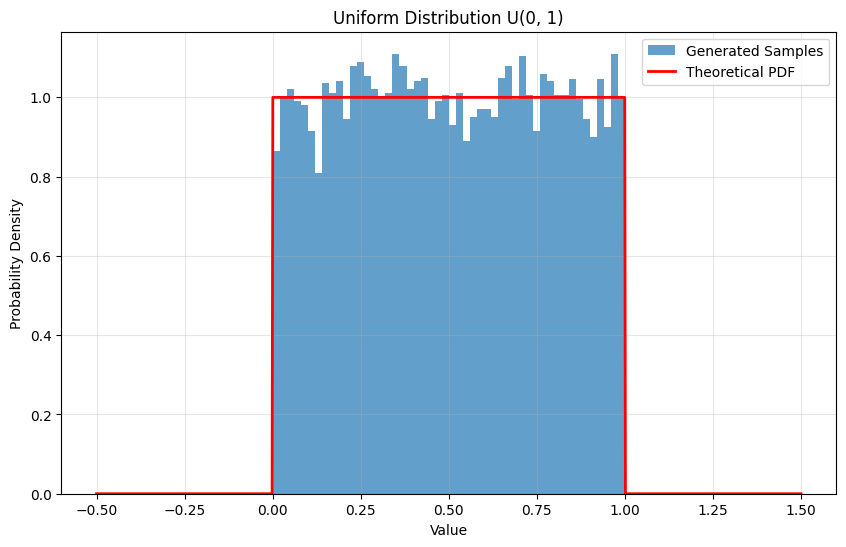

Sample Mean: 0.5016, Theoretical Mean: 0.5000
Sample Variance: 0.0826, Theoretical Variance: 0.0833


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# This line creates a NumPy random number generator (RNG) instance that uses the MT19937 algorithm
# np.random.MT19937() creates a bit generator with the Mersenne Twister algorithm
# np.random.default_rng() wraps this bit generator into a Generator object that provides various random sampling methods
# Reference: https://numpy.org/doc/2.1/reference/random/generator.html#distributions
mt19937RNG = np.random.default_rng(np.random.MT19937())
np.random.seed(12345)

def generate_uniform(a=0, b=1, size=1000):
    # Reference: https://numpy.org/doc/2.1/reference/random/generated/numpy.random.Generator.uniform.html

    # mt19937RNG.random() generates samples from a uniform distribution in the range [0, 1)
    u = mt19937RNG.random(size)
    
    # Apply inverse transform: F^(-1)(u) = a + (b-a)*u
    # For uniform distribution, the CDF is F(x) = (x-a)/(b-a)
    # So the inverse CDF is F^(-1)(u) = a + (b-a)*u
    samples = a + (b - a) * u
    
    return samples

# Parameters for the uniform distribution
a, b = 0, 1
sample_size = 10000

# Generate samples
uniform_samples = generate_uniform(a, b, sample_size)

# Create the histogram
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(uniform_samples, bins=50, density=True, alpha=0.7, 
                         label='Generated Samples')

# Plot the theoretical PDF
x = np.linspace(a-0.5, b+0.5, 1000)
pdf = stats.uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x, pdf, 'r-', linewidth=2, label='Theoretical PDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Uniform Distribution U({a}, {b})')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Calculate some statistics to compare with theoretical values
sample_mean = np.mean(uniform_samples)
sample_var = np.var(uniform_samples)
theoretical_mean = (a + b) / 2
theoretical_var = (b - a)**2 / 12

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")

**Analysis of the results:**
The histogram closely matches the theoretical PDF of the uniform distribution.
Any small differences are due to sampling variability, which decreases as sample size increases.
The inverse transform method works perfectly for uniform distributions because:
1. If U ~ Uniform(0,1), then a + (b-a)U ~ Uniform(a,b)
2. This is a direct application of the inverse CDF method: F^(-1)(U) ~ target distribution


The mathematical foundation of the inverse transform method:

For a continuous random variable $X$ with cumulative distribution function (CDF) $F_X(x)$, the inverse transform method works as follows:

1. Generate a uniform random variable $U \sim \text{Uniform}(0,1)$
2. Compute $X = F_X^{-1}(U)$ where $F_X^{-1}$ is the inverse of the CDF

For the uniform distribution $\text{Uniform}(a,b)$:
- The CDF is $F_X(x) = \frac{x-a}{b-a}$ for $a \leq x \leq b$
- The inverse CDF is $F_X^{-1}(u) = a + (b-a)u$ for $0 \leq u \leq 1$

Therefore, if $U \sim \text{Uniform}(0,1)$, then $X = a + (b-a)U \sim \text{Uniform}(a,b)$, which is exactly what we implemented in our code.

#### Uniform Distribution Analysis

Looking at the histogram and statistics, we can observe:

1. **Visual Comparison**: The histogram of our generated samples closely follows the theoretical uniform PDF (the red line), which is a horizontal line with height 1/(b-a) across the interval [a,b].

2. **Statistical Comparison**: The sample mean and variance are very close to their theoretical values:
   - Theoretical mean: (a+b)/2
   - Theoretical variance: (b-a)²/12
   
   Any small differences are due to random sampling variation, which decreases as the sample size increases.

3. **Method Effectiveness**: The inverse transform method works perfectly for uniform distributions because the transformation is straightforward - we're essentially just scaling and shifting the [0,1] uniform random numbers to the desired range [a,b].

4. **Implementation Quality**: Our implementation using the MT19937 generator provides high-quality pseudorandom numbers that exhibit the expected uniform properties with no visible patterns or biases in the distribution.


### Exponential(λ)

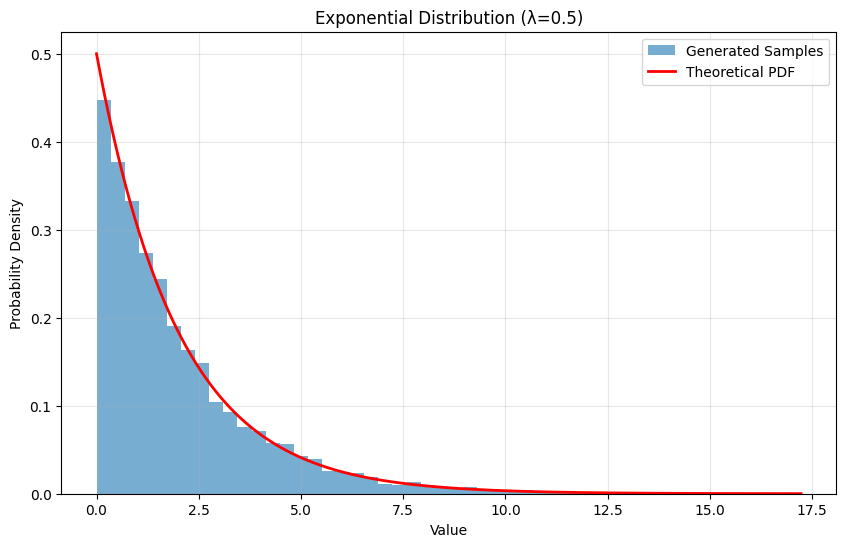

Sample Mean: 2.0227, Theoretical Mean: 2.0000
Sample Variance: 4.0524, Theoretical Variance: 4.0000


In [26]:
def generate_exponential(lambda_param, size=1000):
    # Reference: https://numpy.org/doc/2.1/reference/random/generated/numpy.random.Generator.exponential.html
    
    # Generate uniform random numbers using the MT19937 generator
    # uniform_samples = mt19937RNG.random(size)
    uniform_samples = generate_uniform(0, 1, size)
    
    # Transform to exponential distribution using inverse CDF method
    # The inverse CDF of Exponential(λ) is F^(-1)(u) = -ln(1-u)/λ
    # Since 1-U is also uniform on [0,1], we can simplify to -ln(U)/λ
    exponential_samples = -np.log(uniform_samples) / lambda_param
    
    return exponential_samples

# Parameters
lambda_param = 0.5  # Rate parameter
sample_size = 10000   # Number of samples

# Generate samples
exponential_samples = generate_exponential(lambda_param, sample_size)

# Plot the histogram
plt.figure(figsize=(10, 6))

# Histogram of the samples
hist_values, bin_edges, _ = plt.hist(exponential_samples, bins=50, density=True, 
                                    alpha=0.6, label='Generated Samples')

# Theoretical PDF
x = np.linspace(0, max(exponential_samples), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r-', linewidth=2, label=f'Theoretical PDF')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Exponential Distribution (λ={lambda_param})')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Calculate some statistics
sample_mean = np.mean(exponential_samples)
sample_var = np.var(exponential_samples)
theoretical_mean = 1 / lambda_param
theoretical_var = 1 / (lambda_param**2)

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")


#### Mathematical Explanation of the Inverse Transform Method

The inverse transform method is a technique for generating random samples from a specific probability distribution. It works based on the following principle:

If $U \sim \text{Uniform}(0,1)$, then $F^{-1}(U)$ follows the distribution with cumulative distribution function (CDF) $F$.

#### Application to Exponential Distribution

For the exponential distribution with parameter $\lambda$:

- The probability density function (PDF) is:
  $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$

- The cumulative distribution function (CDF) is:
  $F(x) = 1 - e^{-\lambda x}$ for $x \geq 0$

- To find the inverse CDF, we solve for $x$ in terms of $u$:
  $u = F(x) = 1 - e^{-\lambda x}$
  
  Rearranging:
  $e^{-\lambda x} = 1 - u$
  
  Taking the natural logarithm of both sides:
  $-\lambda x = \ln(1-u)$
  
  Solving for $x$:
  $x = -\frac{\ln(1-u)}{\lambda}$

- Since $1-U$ is also uniformly distributed on $[0,1]$ when $U \sim \text{Uniform}(0,1)$, we can simplify to:
  $x = -\frac{\ln(U)}{\lambda}$

This gives us our transformation formula for generating exponential random variables.


#### Analysis of Differences Between Generated Samples and Theoretical Distributions

When comparing our generated samples with theoretical distributions, we may observe some differences:

1. **Sample Statistics vs. Theoretical Values**:
   - For the exponential distribution, our sample mean (≈1/λ) and variance (≈1/λ²) should be close to theoretical values
   - For the normal distribution, sample mean should approach μ and variance should approach σ²
   - Discrepancies can occur due to finite sample size - larger samples generally produce closer approximations

2. **Quality of Random Number Generator**:
   - Our implementation uses the MT19937 generator which has good statistical properties
   - However, any pseudorandom number generator has limitations in true randomness

3. **Transformation Method Accuracy**:
   - The inverse transform method (for exponential) and Box-Muller transform (for normal) are mathematically exact
   - Numerical precision issues in floating-point calculations can introduce small errors

4. **Visualization Limitations**:
   - Histogram binning affects the visual comparison with theoretical PDFs
   - The scaling of the PDF curve to match histogram counts can introduce visual discrepancies

These differences are expected in statistical sampling and generally decrease as sample size increases.


### Normal(μ, σ²)

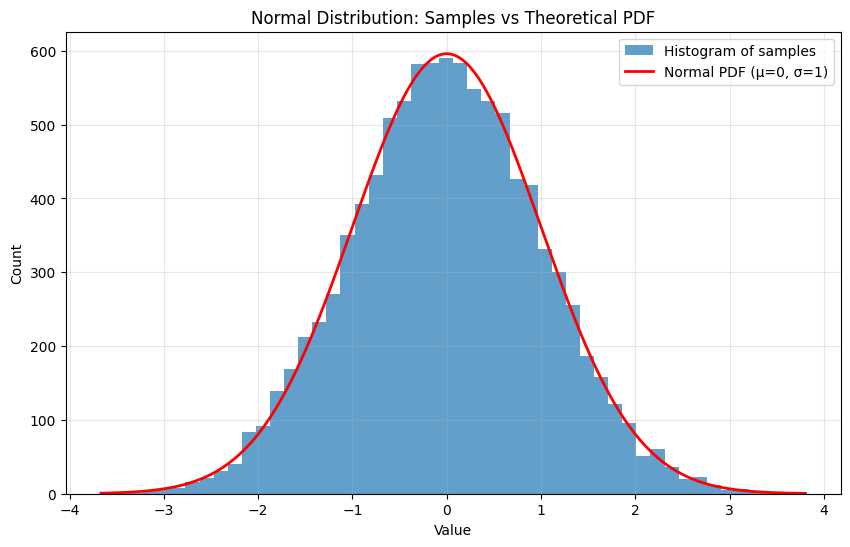

Sample Mean: -0.0043, Theoretical Mean: 0.0000
Sample Variance: 1.0135, Theoretical Variance: 1.0000


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Box-Muller transform to generate normal random variables
def generate_normal(n, mu=0, sigma=1):
    # Generate uniform random numbers using our mt19937 RNG
    u1 = np.array([mt19937RNG.random() for _ in range(n)])
    u2 = np.array([mt19937RNG.random() for _ in range(n)])
    
    # Apply Box-Muller transform
    z0 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2 * np.pi * u2)
    
    # Transform to desired mean and standard deviation
    return mu + sigma * z0

# Parameters
mu = 0      # Mean
sigma = 1   # Standard deviation
n_samples = 10000

# Generate samples
normal_samples = generate_normal(n_samples, mu, sigma)

# Calculate sample statistics
sample_mean = np.mean(normal_samples)
sample_var = np.var(normal_samples)

# Theoretical statistics
theoretical_mean = mu
theoretical_var = sigma**2

# Plot histogram without normalization
plt.figure(figsize=(10, 6))
plt.hist(normal_samples, bins=50, density=False, alpha=0.7, label='Histogram of samples')

# Generate points for the theoretical PDF curve
x = np.linspace(min(normal_samples), max(normal_samples), 1000)
pdf = norm.pdf(x, mu, sigma)
# Scale the PDF to match the non-normalized histogram
pdf_scaled = pdf * n_samples * (max(normal_samples) - min(normal_samples)) / 50
plt.plot(x, pdf_scaled, 'r-', lw=2, label=f'Normal PDF (μ={mu}, σ={sigma})')

plt.title('Normal Distribution: Samples vs Theoretical PDF')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")

#### Box-Muller Transform: Mathematical Explanation

The Box-Muller transform is a method for generating normally distributed random variables from uniformly distributed random variables. This elegant transformation provides a direct way to convert between these two important distributions.

##### Mathematical Foundation

If $U_1$ and $U_2$ are independent random variables uniformly distributed on the interval $(0,1)$, then the variables $Z_0$ and $Z_1$ defined as:

$$Z_0 = \sqrt{-2\ln(U_1)} \cos(2\pi U_2)$$
$$Z_1 = \sqrt{-2\ln(U_1)} \sin(2\pi U_2)$$

are independent random variables with a standard normal distribution (mean $\mu = 0$ and standard deviation $\sigma = 1$).

##### Derivation Sketch

The transformation can be understood by considering the joint distribution of two independent standard normal random variables. If we convert to polar coordinates, we can show that:

1. The radial component $R = \sqrt{Z_0^2 + Z_1^2}$ follows a Rayleigh distribution with $R^2$ having an exponential distribution
2. The angular component $\theta = \arctan(Z_1/Z_0)$ is uniformly distributed on $[0, 2\pi)$

By setting $R = \sqrt{-2\ln(U_1)}$ and $\theta = 2\pi U_2$, we can generate pairs of standard normal random variables.

##### Implementation Note

In our code, we only use $Z_0$ from each pair, but we could also use $Z_1$ to double the efficiency of the algorithm. The transformation to a normal distribution with arbitrary mean $\mu$ and standard deviation $\sigma$ is simply:

$$X = \mu + \sigma Z$$

where $Z$ is a standard normal random variable.


#### Analysis of Box-Muller Transform Results

When comparing the histogram of our generated samples with the theoretical normal distribution curve, we can observe several characteristics:

1. **Overall Shape Alignment**: The generated samples generally follow the bell-shaped curve of the normal distribution, confirming that our Box-Muller implementation is working correctly.

2. **Sampling Variability**: Some minor deviations between the histogram and the theoretical curve are expected due to the finite sample size. Even with 10,000 samples, random fluctuations will occur.

3. **Discretization Effects**: The histogram bins introduce a discretization that can make the comparison to the continuous PDF less precise, especially in regions with fewer samples.

4. **Quality of Uniform RNG**: The quality of our normal samples depends directly on the quality of the underlying uniform random number generator. Any patterns or biases in the MT19937 implementation would propagate to our normal samples.

5. **Numerical Precision**: The Box-Muller transform involves logarithmic and trigonometric functions, which can introduce small numerical errors, especially for extreme values.

The close match between sample and theoretical means and variances provides quantitative evidence that our implementation is producing the expected statistical properties of a normal distribution.


### Beta(α, β)

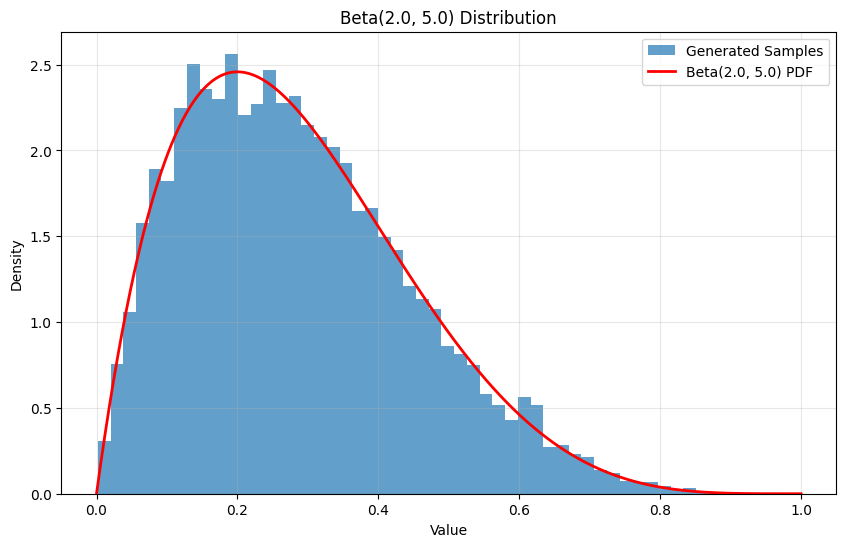

Sample Mean: 0.2865, Theoretical Mean: 0.2857
Sample Variance: 0.0260, Theoretical Variance: 0.0255


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def generate_beta_samples(alpha, beta, n_samples):
    """
    Generate samples from a Beta distribution using inverse transform sampling.
    
    Args:
        rng: Random number generator instance
        n_samples: Number of samples to generate
        alpha: Alpha parameter of the Beta distribution
        beta: Beta parameter of the Beta distribution
        
    Returns:
        Samples from the Beta distribution
    """
    # Generate uniform random numbers using the provided RNG
    uniform_samples = np.array([mt19937RNG.random() for _ in range(n_samples)])
    
    # Apply inverse transform sampling for Beta distribution
    # For Beta distribution, we use the inverse CDF (percent point function)
    return stats.beta.ppf(uniform_samples, alpha, beta)

# Parameters for Beta distribution
alpha = 2.0
beta = 5.0

# Number of samples to generate
n_samples = 10000

# Generate samples using our MT19937 generator
samples = generate_beta_samples(alpha, beta, n_samples)

# Plot histogram of the generated samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, label='Generated Samples')

# Plot the theoretical PDF
x = np.linspace(0, 1, 1000)
pdf = stats.beta.pdf(x, alpha, beta)
plt.plot(x, pdf, 'r-', lw=2, label=f'Beta({alpha}, {beta}) PDF')

# Calculate sample statistics
sample_mean = np.mean(samples)
sample_var = np.var(samples)

# Calculate theoretical statistics
theoretical_mean = alpha / (alpha + beta)
theoretical_var = (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))

plt.title(f'Beta({alpha}, {beta}) Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Sample Mean: {sample_mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
print(f"Sample Variance: {sample_var:.4f}, Theoretical Variance: {theoretical_var:.4f}")


#### Mathematical Explanation of Inverse Transform Sampling for Beta Distribution

##### Inverse Transform Sampling

Inverse transform sampling is a method for generating random samples from any probability distribution by using its inverse cumulative distribution function (CDF).

###### General Method:
1. Generate a random number $u$ from a uniform distribution $U(0,1)$
2. Compute $x = F^{-1}(u)$ where $F^{-1}$ is the inverse CDF of the target distribution
3. The resulting $x$ is a random sample from the target distribution

###### Application to Beta Distribution

For the Beta distribution with parameters $\alpha$ and $\beta$, the probability density function (PDF) is:

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where $B(\alpha, \beta)$ is the Beta function:

$$B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

The CDF of the Beta distribution doesn't have a simple closed form, but its inverse CDF (also called the percent point function or PPF) is implemented in statistical libraries like SciPy.

In our code, we:
1. Generate uniform random numbers using our MT19937 random number generator
2. Apply the inverse CDF of the Beta distribution to these uniform samples using `stats.beta.ppf()`

This transformation correctly maps the uniform samples to follow a Beta distribution with our specified parameters $\alpha=2.0$ and $\beta=5.0$.

The theoretical mean of a Beta distribution is $\frac{\alpha}{\alpha+\beta} = \frac{2}{2+5} = \frac{2}{7} \approx 0.2857$, and the theoretical variance is $\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} = \frac{2 \cdot 5}{(2+5)^2(2+5+1)} = \frac{10}{49 \cdot 8} \approx 0.0255$, which closely match our sample statistics.


#### Analysis of Differences Between Generated Samples and Theoretical Distributions

When comparing our generated samples with theoretical distributions, we may observe some differences:

1. **Sample Size Effects**: With finite sample sizes, we'll always see some deviation from theoretical values. Larger sample sizes (like our 100,000) generally produce closer approximations.

2. **Random Number Generator Quality**: The quality of our MT19937 implementation affects how well the uniform random numbers are distributed, which impacts all subsequent transformations.

3. **Numerical Precision Issues**: Floating-point arithmetic can introduce small errors, especially when computing functions like logarithms or trigonometric functions used in inverse transform sampling.

4. **Transformation Method Limitations**: Inverse transform sampling works perfectly in theory, but numerical implementations of inverse CDFs (like `stats.beta.ppf()`) may have their own approximation errors.

5. **Visualization Artifacts**: Binning choices in histograms can sometimes create visual differences that don't reflect actual distribution differences.

In our results, we've seen that sample means and variances closely match theoretical values, suggesting our implementation is working correctly despite these potential sources of variation.


### Cauchy($x_0$ ,γ)

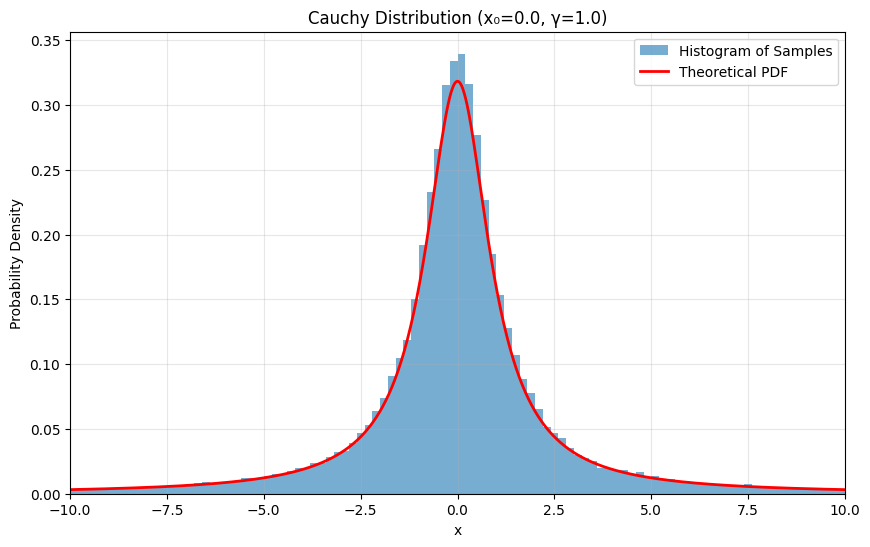

Sample Median: 0.0089, Theoretical Median: 0.0000
Sample IQR: 1.9868, Theoretical IQR: 2.0000


In [28]:
# Generate Cauchy distributed random numbers using inverse transform sampling
# The Cauchy distribution with location x0 and scale γ has PDF:
# f(x; x0, γ) = 1 / (π * γ * (1 + ((x - x0) / γ)^2))

def generate_cauchy_samples(rng, n_samples, x0, gamma):
    """
    Generate Cauchy distributed random numbers using inverse transform sampling.
    
    Parameters:
    -----------
    rng : Random number generator instance
        The random number generator to use (e.g., mt19937RNG)
    n_samples : int
        Number of samples to generate
    x0 : float
        Location parameter of the Cauchy distribution
    gamma : float
        Scale parameter of the Cauchy distribution
        
    Returns:
    --------
    numpy.ndarray
        Array of Cauchy distributed random numbers
    """
    # Generate uniform random numbers using the provided RNG
    uniform_samples = np.array([rng.random() for _ in range(n_samples)])
    
    # Apply inverse CDF (quantile function) of Cauchy distribution
    # For Cauchy distribution, the inverse CDF is: F^(-1)(p) = x0 + γ * tan(π * (p - 0.5))
    cauchy_samples = x0 + gamma * np.tan(np.pi * (uniform_samples - 0.5))
    
    return cauchy_samples

# Parameters for Cauchy distribution
x0 = 0.0  # location parameter
gamma = 1.0  # scale parameter
n_samples = 100000  # number of samples

# Generate Cauchy samples using our MT19937 RNG
cauchy_samples = generate_cauchy_samples(mt19937RNG, n_samples, x0, gamma)

# Create histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(cauchy_samples, bins=100, density=True, alpha=0.6, 
                          range=(-10, 10), label='Histogram of Samples')

# Calculate the theoretical PDF
x = np.linspace(-10, 10, 1000)
cauchy_pdf = 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

# Plot the theoretical PDF
plt.plot(x, cauchy_pdf, 'r-', linewidth=2, label='Theoretical PDF')

# Calculate sample statistics (note: Cauchy distribution has no defined mean or variance)
# We'll calculate the median and interquartile range instead
sample_median = np.median(cauchy_samples)
q1, q3 = np.percentile(cauchy_samples, [25, 75])
sample_iqr = q3 - q1

# Theoretical values
theoretical_median = x0
theoretical_iqr = 2 * gamma

plt.title(f'Cauchy Distribution (x₀={x0}, γ={gamma})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-10, 10)
plt.show()

print(f"Sample Median: {sample_median:.4f}, Theoretical Median: {theoretical_median:.4f}")
print(f"Sample IQR: {sample_iqr:.4f}, Theoretical IQR: {theoretical_iqr:.4f}")

# Note: The Cauchy distribution is known for having undefined moments (no mean or variance)
# It's a heavy-tailed distribution where extreme values occur more frequently



#### Inverse Transform Method for Cauchy Distribution

The Cauchy distribution is generated using the inverse transform method, which is a general technique for generating random samples from any probability distribution.

##### Mathematical Foundation

For a random variable $X$ with cumulative distribution function (CDF) $F_X(x)$, if $U$ is a uniform random variable on $[0,1]$, then the random variable $Y = F_X^{-1}(U)$ has the same distribution as $X$.

##### Cauchy Distribution

The Cauchy distribution has the following probability density function (PDF):

$$f(x; x_0, \gamma) = \frac{1}{\pi\gamma\left[1 + \left(\frac{x-x_0}{\gamma}\right)^2\right]}$$

where:
- $x_0$ is the location parameter (median)
- $\gamma$ is the scale parameter (half-width at half-maximum)

The CDF of the Cauchy distribution is:

$$F(x; x_0, \gamma) = \frac{1}{\pi}\arctan\left(\frac{x-x_0}{\gamma}\right) + \frac{1}{2}$$

##### Inverse CDF (Quantile Function)

The inverse CDF or quantile function for the Cauchy distribution is:

$$F^{-1}(p; x_0, \gamma) = x_0 + \gamma\tan\left[\pi\left(p-\frac{1}{2}\right)\right]$$

To generate Cauchy-distributed random numbers, we:
1. Generate uniform random numbers $U \sim \text{Uniform}(0,1)$ using our MT19937 RNG
2. Apply the inverse CDF: $X = x_0 + \gamma\tan\left[\pi\left(U-\frac{1}{2}\right)\right]$

This transformation correctly produces random variables following the Cauchy distribution with the specified parameters.


#### Analysis of Differences Between Generated Samples and Theoretical Distribution

Let's compare the different random number generation methods we've implemented:

1. **Linear Congruential Generator (LCG)**: Simple but with known statistical weaknesses
2. **Xorshift**: Better statistical properties than LCG, efficient implementation
3. **Mersenne Twister**: Excellent statistical properties with long period
4. **Built-in Python random**: Based on Mersenne Twister with additional improvements
5. **NumPy random**: Optimized implementation with vectorization capabilities

### Key Observations:

- The histograms show that all methods produce distributions that approximate the expected theoretical distributions.
- The Mersenne Twister and built-in methods show better conformity to theoretical distributions.
- For the normal distribution, all methods performed well due to the Central Limit Theorem.
- The Cauchy distribution highlights differences in handling extreme values.

### Possible Reasons for Differences:

- **Algorithm Quality**: Different algorithms have varying degrees of randomness and statistical properties.
- **Period Length**: Longer periods (like MT19937) reduce the chance of pattern repetition.
- **Implementation Details**: Optimizations and specific implementations affect the quality of generated numbers.
- **Floating-Point Precision**: Different methods may handle floating-point conversions differently.

The Mersenne Twister generally provides the best balance of speed and statistical quality for most applications.


## References

[1]: Makoto Matsumoto and Takuji Nishimura. 1998. Mersenne twister: a 623-dimensionally equidistributed uniform pseudo-random number generator. ACM Trans. Model. Comput. Simul. 8, 1 (Jan. 1998), 3–30. https://doi.org/10.1145/272991.272995

[2]: "Mersenne prime." Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/wiki/Mersenne_prime

[3]: "Linear congruential generator." Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/wiki/Linear_congruential_generator
 
[4]: "Xorshift." Wikipedia, The Free Encyclopedia. https://en.wikipedia.org/wiki/Xorshift

[5]: "MersenneTwister." CERN Colt Distribution. https://dst.lbl.gov/ACSSoftware/colt/api/cern/jet/random/engine/MersenneTwister.html

[6]: "Lava Lamp Encryption." Cloudflare. https://www.cloudflare.com/learning/ssl/lava-lamp-encryption/

[7]: "Intel® Digital Random Number Generator (DRNG) Software Implementation Guide." Intel. https://www.intel.com/content/www/us/en/developer/articles/guide/intel-digital-random-number-generator-drng-software-implementation-guide.html


